Import all the Dependencies

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


from tensorflow.keras.preprocessing.image import ImageDataGenerator

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

Set all the Constants

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [31]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#   

[[[0.68947977 0.64242095 0.6502641 ]
  [0.6908903  0.6438315  0.6516746 ]
  [0.69212174 0.64506286 0.652906  ]
  ...
  [0.64705884 0.6039216  0.627451  ]
  [0.6207107  0.57757336 0.60110277]
  [0.61960787 0.5764706  0.6       ]]

 [[0.6752975  0.6282387  0.6360818 ]
  [0.6755216  0.6284628  0.6363059 ]
  [0.6771634  0.6301046  0.63794774]
  ...
  [0.64513755 0.6020003  0.6255297 ]
  [0.61960787 0.5764706  0.6       ]
  [0.6193765  0.5762392  0.59976864]]

 [[0.6947977  0.6477389  0.655582  ]
  [0.6927453  0.6456865  0.65352964]
  [0.690693   0.6436342  0.65147734]
  ...
  [0.6422643  0.59912705 0.62265646]
  [0.61960787 0.5764706  0.6       ]
  [0.618966   0.57582873 0.59935814]]

 ...

 [[0.46210328 0.40327972 0.41504446]
  [0.4660033  0.40717977 0.41894448]
  [0.47313994 0.41431642 0.42608112]
  ...
  [0.47002408 0.42296526 0.43865153]
  [0.47741246 0.43035364 0.44603992]
  [0.480857   0.4337982  0.44948447]]

 [[0.46251374 0.4036902  0.4154549 ]
  [0.46641377 0.4075902  0.41935495]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.69002354 0.67825884 0.7213961 ]
  [0.69044787 0.67868316 0.7218204 ]
  [0.6908722  0.6791075  0.72224474]
  ...
  [0.5154488  0.4840763  0.5272135 ]
  [0.55827993 0.5269074  0.57004464]
  [0.54294384 0.5115713  0.55470854]]

 [[0.6809358  0.6691711  0.7123084 ]
  [0.68121874 0.66945404 0.7125913 ]
  [0.6815016  0.6697369  0.7128742 ]
  ...
  [0.51785326 0.48648068 0.52961797]
  [0.557997   0.52662444 0.5697617 ]
  [0.54181236 0.5104398  0.55357707]]

 [[0.6784314  0.6666667  0.70980394]
  [0.6784314  0.6666667  0.70980394]
  [0.6784314  0.6666667  0.70980394]
  ...
  [0.5202576  0.48888505 0.5320223 ]
  [0.55771416 0.5263416  0.56947887]
  [0.5406809  0.50930834 0.5524456 ]]

 ...

 [[0.7442416  0.7324769  0.75992787]
  [0.743563   0.7317983  0.75924927]
  [0.75224984 0.74048513 0.7679361 ]
  ...
  [0.6432922  0.63544905 0.6550569 ]
  [0.6439994  0.63615626 0.6557641 ]
  [0.64470655 0.6368634  0.65647125]]

 [[0.7439587  0.732194   0.759645  ]
  [0.74370444 0.73193973 0.7593907 ]


Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
47/47 [==============================] - 73s 2s/step - loss: 0.8981 - accuracy: 0.4912 - val_loss: 0.8281 - val_accuracy: 0.6979
Epoch 2/10
47/47 [==============================] - 66s 1s/step - loss: 0.7416 - accuracy: 0.6493 - val_loss: 0.4889 - val_accuracy: 0.8229
Epoch 3/10
47/47 [==============================] - 64s 1s/step - loss: 0.5007 - accuracy: 0.7904 - val_loss: 0.3846 - val_accuracy: 0.8125
Epoch 4/10
47/47 [==============================] - 63s 1s/step - loss: 0.3047 - accuracy: 0.8697 - val_loss: 0.3028 - val_accuracy: 0.8750
Epoch 5/10
47/47 [==============================] - 61s 1s/step - loss: 0.2841 - accuracy: 0.8813 - val_loss: 0.2985 - val_accuracy: 0.8438
Epoch 6/10
47/47 [==============================] - 64s 1s/step - loss: 0.2079 - accuracy: 0.9172 - val_loss: 0.2014 - val_accuracy: 0.9062
Epoch 7/10
47/47 [==============================] - 67s 1s/step - loss: 0.1620 - accuracy: 0.9444 - val_loss: 0.1780 - val_accuracy: 0.9010
Epoch 8/10
47/47 [==

In [18]:
scores = model.evaluate(test_generator) #testing on the 10% saved data

14/14 [==============================] - 10s 709ms/step - loss: 0.1386 - accuracy: 0.9420


In [19]:
scores

[0.13862095773220062, 0.94199538230896]

Scores is just a list containing loss and accuracy value

Plotting the Accuracy and Loss Curves

In [20]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

10

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8981080055236816,
 0.741612434387207,
 0.5007082223892212,
 0.3047490417957306,
 0.28405478596687317]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.6979166865348816,
 0.8229166865348816,
 0.8125,
 0.875,
 0.84375,
 0.90625,
 0.9010416865348816,
 0.8958333134651184,
 0.953125,
 0.953125]

In [28]:
acc

[0.4911804497241974,
 0.6492537260055542,
 0.7903663516044617,
 0.869742214679718,
 0.8812754154205322,
 0.9172320365905762,
 0.9443690776824951,
 0.9375848174095154,
 0.9369063973426819,
 0.9470827579498291]

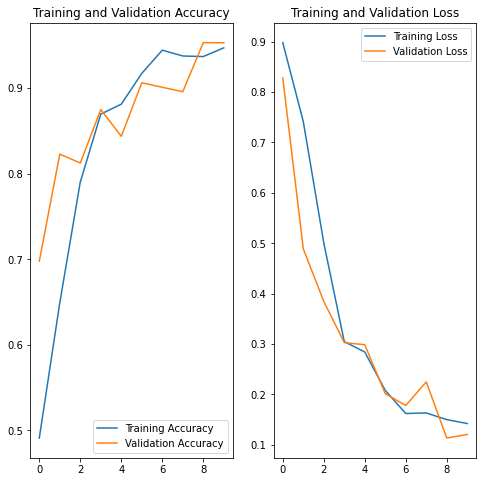

In [29]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 362ms/step
predicted label: Potato___Late_blight


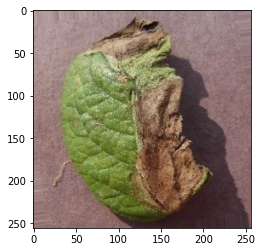

In [34]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

Write a function for inference

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


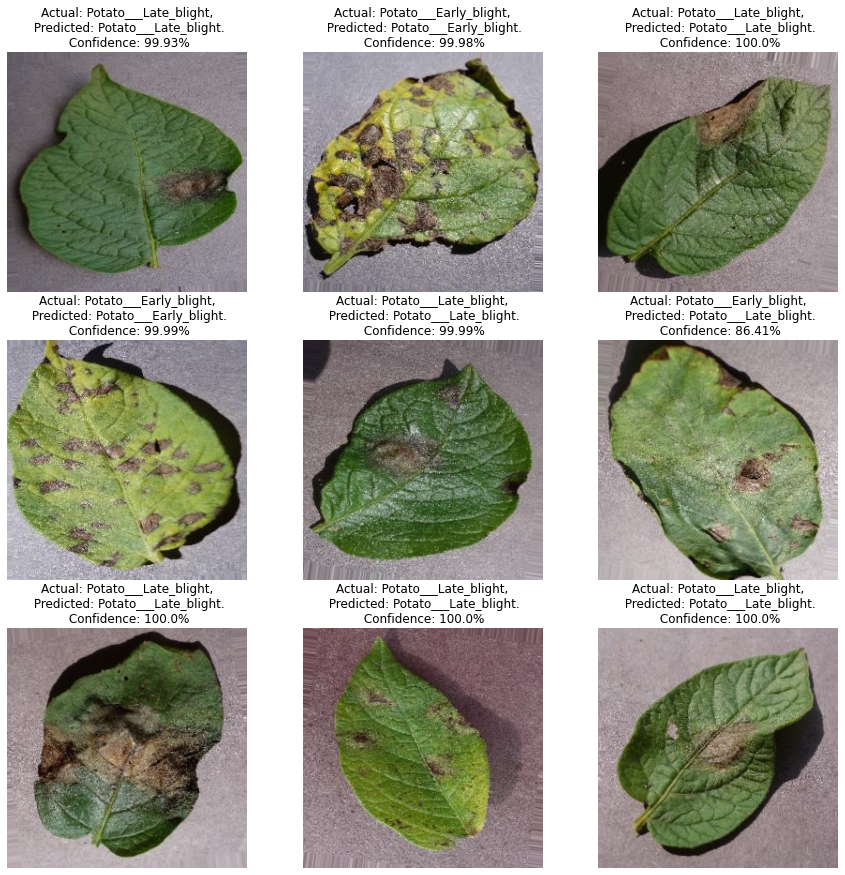

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Saving the Model


Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [37]:
model.save("../potatoes.h5")

In [1]:
tf.math.confusion_matrix(lables,predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=conf_matrix)

NameError: name 'tf' is not defined